#### Get `Kernel Density Map`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def get_score_map(pcd, nbins=30, bandwidth=0.1, PLOT=False):
    """
        Get the score of the physical safety score
    """
    x, y, z = pcd[:, 0], pcd[:, 1], pcd[:, 2]

    # Create KDE
    density = stats.gaussian_kde(pcd.T, bw_method=bandwidth)
    nbins = nbins
    xi, yi, zi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j, z.min():z.max():nbins*1j]

    # Compute density
    coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
    di = density(coords).reshape(xi.shape)

    # Normalize density (around 1)
    di_normalized = di / np.max(di)
    # score_physical = di_normalized

    if PLOT:
        # Plotting
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(xi.flatten(), yi.flatten(), zi.flatten(), c=di_normalized.flatten(), cmap='viridis', edgecolor='0.1', alpha=0.3)

        plt.xlabel('X')
        plt.ylabel('Y')
        ax.set_zlabel('Z')
        plt.colorbar(scatter, ax=ax)
        plt.show()

    return di_normalized, di

def sample_pcd_from_score_map(score_map, pcd, di, nbins, num_samples=10):
    """
        Sample the pcd from the score_map
    """
    # Flatten the normalized score_physical
    score_map_flat = score_map.flatten()
    score_map_norm = score_map_flat / np.sum(score_map_flat)

    sampled_indices = np.random.choice(len(score_map_flat), size=num_samples, p=score_map_norm)
    sampled_coords = np.array(np.unravel_index(sampled_indices, di.shape)).T

    # Convert indices to actual coordinates
    x, y, z = pcd[:, 0], pcd[:, 1], pcd[:, 2]
    x_range = np.linspace(x.min(), x.max(), nbins)
    y_range = np.linspace(y.min(), y.max(), nbins)
    z_range = np.linspace(z.min(), z.max(), nbins)

    sampled_xyz = np.array([x_range[sampled_coords[:, 0]], y_range[sampled_coords[:, 1]], z_range[sampled_coords[:, 2]]]).T

    return sampled_xyz

def plot_score_map(score_map, pcd, nbins):
    """
        Plot the score map
    """
    x, y, z = pcd[:, 0], pcd[:, 1], pcd[:, 2]
    xi, yi, zi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j, z.min():z.max():nbins*1j]

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    origin_pcd = ax.scatter(x, y, z, c='r', marker='o', s=10)

    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter(x, y, z, c='r', marker='o')
    ax.scatter(xi.flatten(), yi.flatten(), zi.flatten(), c=score_map.flatten(), cmap='viridis', alpha=0.01)
    plt.colorbar(origin_pcd, ax=ax)
    plt.show()

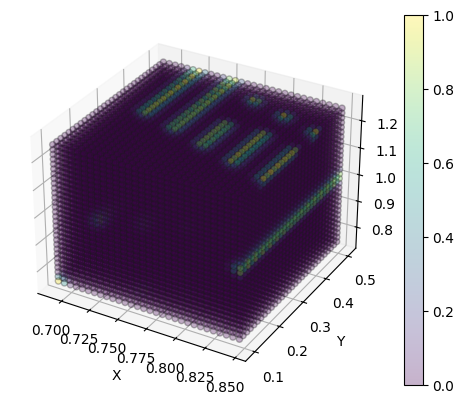

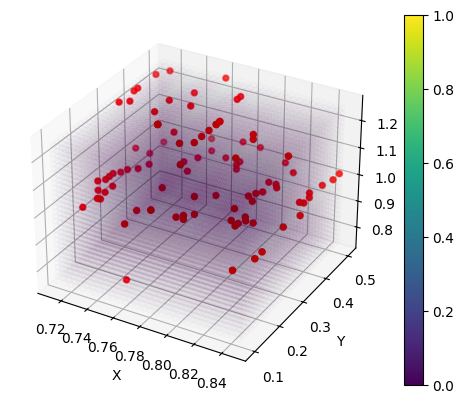

In [ ]:
bandwidth = 0.1
nbins = 30
n_samples = 100

feasible_pcds = np.load('../scene/office_bookshelf/data/dense/feasible_pcd_20230908_c48_g4_worker48_2.npy')
score_map, di = get_score_map(feasible_pcds, nbins=nbins, bandwidth=bandwidth, PLOT=True)
sampled_physical = sample_pcd_from_score_map(score_map, feasible_pcds, di, nbins=nbins, num_samples=n_samples)
plot_score_map(score_map, sampled_physical, nbins=nbins)

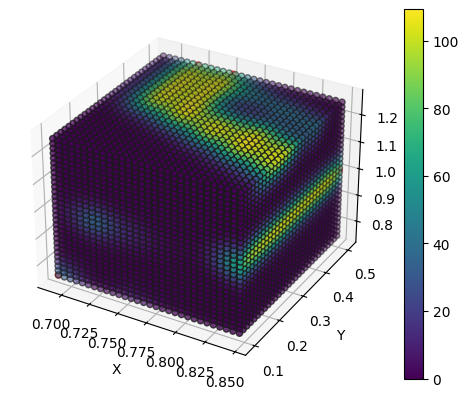

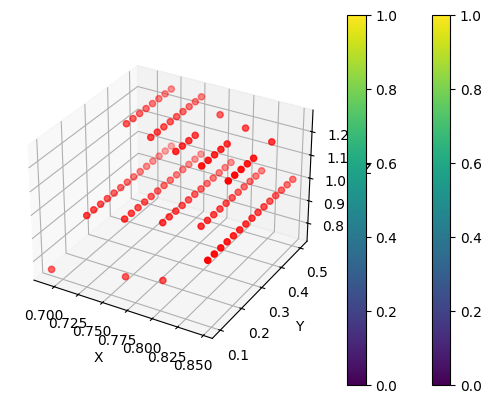

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

feasible_pcds = np.load('../scene/office_bookshelf/data/dense/feasible_pcd_20230908_c48_g4_worker48_2.npy')
x, y, z = feasible_pcds[:, 0], feasible_pcds[:, 1], feasible_pcds[:, 2]

# Create KDE
density = stats.gaussian_kde(feasible_pcds.T, bw_method=0.3)
nbins = 30
xi, yi, zi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j, z.min():z.max():nbins*1j]

# Compute density
coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
di = density(coords).reshape(xi.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter plot for 3D density representation
scatter = ax.scatter(xi.flatten(), yi.flatten(), zi.flatten(), c=di.flatten(), cmap='viridis', edgecolor='0.1')
origin_pcd = ax.scatter(x, y, z, c='r', marker='o')

plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(scatter, ax=ax)
plt.show()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter plot for 3D density representation
origin_pcd = ax.scatter(x, y, z, c='r', marker='o')
plt.colorbar(origin_pcd, ax=ax)

plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(origin_pcd, ax=ax)

plt.show()


/Users/joonhyung-lee/.pyenv/versions/3.10.5/envs/atlo/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


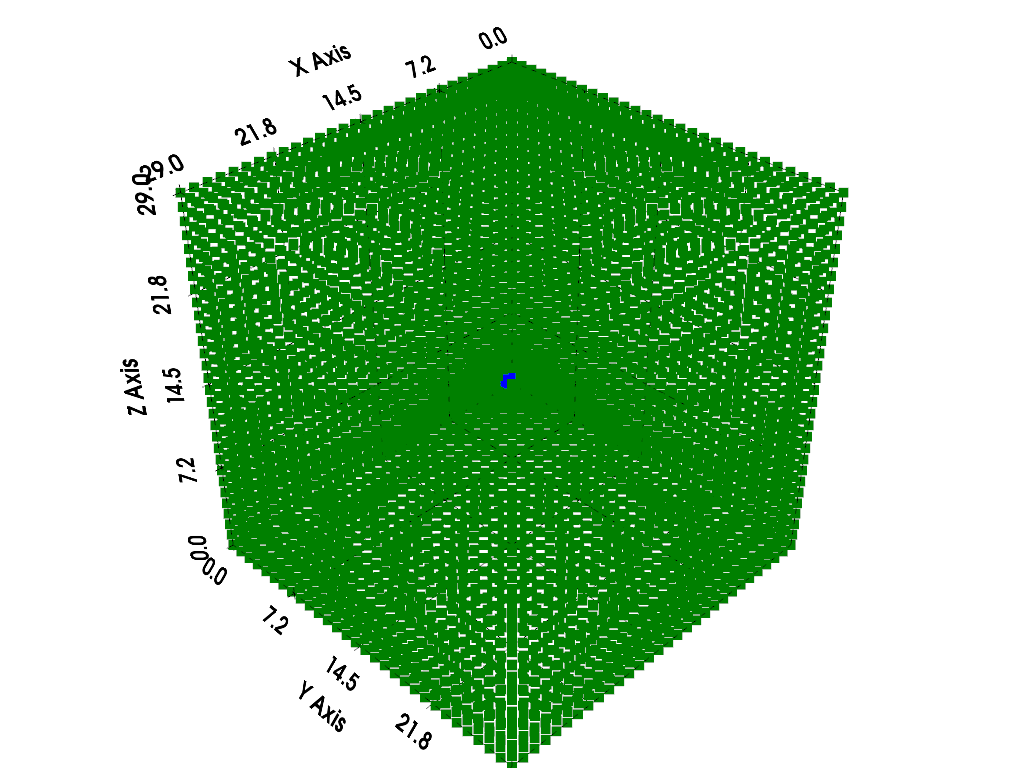

In [8]:
import pyvista as pv

plotter = pv.Plotter()
plotter.add_points(feasible_pcds, color='red', point_size=10)
plotter.add_points(coords.T, color='blue', point_size=10)
plotter.add_points(di.T, color='green', point_size=10)
plotter.show_grid()
plotter.show()

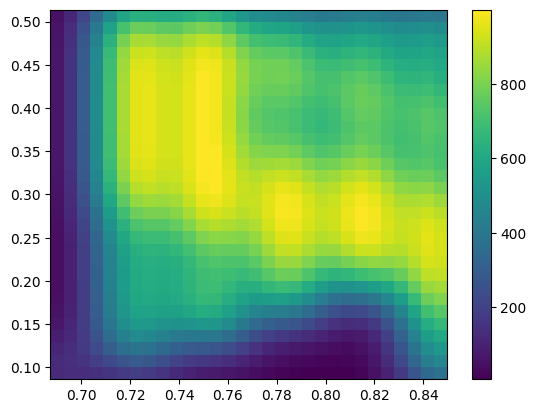

In [9]:
# Compute density
coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
di = density(coords).reshape(xi.shape)

# Sum up density along the z-axis to get a 2D density map
di_summed = np.sum(di, axis=2)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111)

# Use pcolormesh to plot the 2D density map
c = ax.pcolormesh(xi[:,:,0], yi[:,:,0], di_summed, cmap='viridis')
plt.colorbar(c, ax=ax)

plt.show()


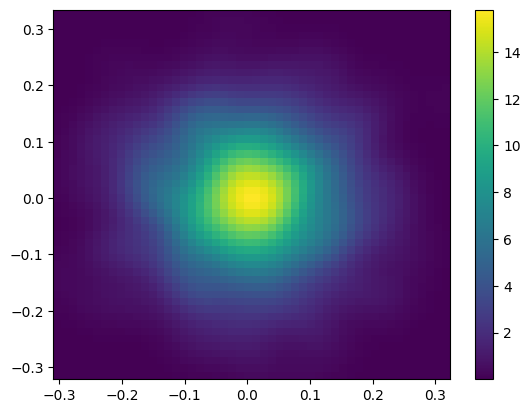

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

mu, sigma = 0, 0.1 
x = np.random.normal(mu, sigma, 1000)
y = np.random.normal(mu, sigma, 1000)

nbins = 50

xy = np.vstack([x,y])
density = stats.gaussian_kde(xy) 

xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
di = density(np.vstack([xi.flatten(), yi.flatten()]))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(xi, yi, di.reshape(xi.shape))
plt.colorbar(ax.pcolormesh(xi, yi, di.reshape(xi.shape)))
plt.show() 

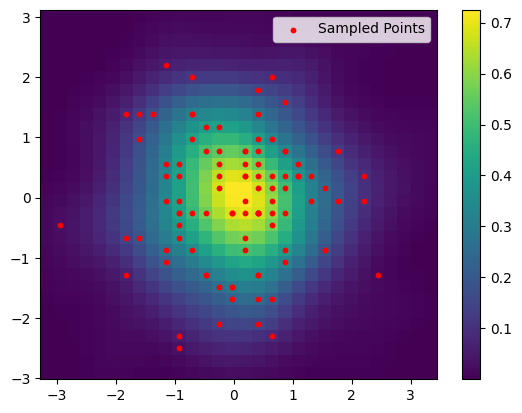

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create example 3D point cloud data (replace with your own)
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
z = np.random.normal(size=1000)
feasible_pcds = np.array([x, y, z])

# Create KDE
density = stats.gaussian_kde(feasible_pcds)

# Create grid
nbins = 30
xi, yi, zi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j, z.min():z.max():nbins*1j]

# Compute density
coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
di = density(coords).reshape(xi.shape)

# Sum up density along the z-axis
di_summed = np.sum(di, axis=2)

# Flatten density map and coordinates for weighted sampling
weights = di_summed.flatten()
weights /= np.sum(weights)  # Normalize weights
xi_flat, yi_flat = xi[:,:,0].flatten(), yi[:,:,0].flatten()

# Perform weighted sampling
n_samples = 100  # Number of points to sample
indices = np.random.choice(len(weights), size=n_samples, p=weights)
sampled_x, sampled_y = xi_flat[indices], yi_flat[indices]

# Plotting
fig, ax = plt.subplots()
c = ax.pcolormesh(xi[:,:,0], yi[:,:,0], di_summed, cmap='viridis')
plt.colorbar(c, ax=ax)

# Overlay sampled points
ax.scatter(sampled_x, sampled_y, color='red', s=10, label='Sampled Points')
plt.legend()

plt.show()
